In [1]:
import cv2
from matplotlib import pyplot as plt
cv2.__version__ # show version

'4.7.0'

In [2]:
# cv2.imread("photo.jpg")  read file as an array

img = cv2.imread('photo.jpg', cv2.IMREAD_COLOR)
# cv2.IMREAD_COLOR  load image as color (default)
# cv2.IMREAD_GRAYSCALE  load image as grayscale

In [3]:
img.shape # return size (3264ㅌ4928 )

(1536, 2048, 3)

In [4]:
# Show image in a window
cv2.imshow('title', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# cv2.imwrite(fileName, image) download image file 

In [6]:
# Sample code

""" img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # esc key
    cv2.destroyAllWindow()
elif k = ord('s'): # 's' key
    cv2.imwrite('lenagray.png',img)
    cv2.destroyAllWindow()
"""

" img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)\ncv2.imshow('image',img)\nk = cv2.waitKey(0)\nif k == 27: # esc key\n    cv2.destroyAllWindow()\nelif k = ord('s'): # 's' key\n    cv2.imwrite('lenagray.png',img)\n    cv2.destroyAllWindow()\n"

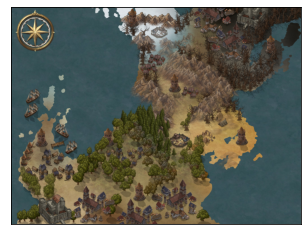

In [7]:
b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge

plt.imshow(img2)
plt.xticks([]) # x축 눈금
plt.yticks([]) # y축 눈금
plt.show()

# Video Processing

In [8]:
# 영상 재생

# cap 이 정상적으로 open이 되었는지 확인하기 위해서 cap.isOpen() 으로 확인가능
cap = cv2.VideoCapture(0)

# cap.get(prodId)/cap.set(propId, value)을 통해서 속성 변경이 가능.
# 3은 width, 4는 heigh

#print ('width: {0}, height: {1}'.format(cap.get(3),cap.get(4)))
cap.set(3,320)
cap.set(4,240)

while(True):
    # ret : frame capture결과(boolean)
    # frame : Capture한 frame
    ret, frame = cap.read()

    if (ret):
        # image를 Grayscale로 Convert함.
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame', gray) # show in window
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [9]:
# 영상 재생 from file

import cv2

cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame', gray) # show in window

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [10]:
# 영상 저장

cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'DIVX') 
# Codec정보. cv2.VideoWriter_fourcc()
# Windows 는 DIVX
out = cv2.VideoWriter('output.avi', fourcc, 25.0, (640,480))
# fileName, fourcc, frame, size

while (cap.isOpened()):
    ret, frame = cap.read()

    if ret:
        # 이미지 반전,  0:상하, 1 : 좌우
        frame = cv2.flip(frame, 1)

        out.write(frame) # our 에다가 capture된 frame 을 저장

        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            # waitkey : 0 > key입력까지 멈춰있음
            # waitkey: 1 > 움직임
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

# 도형 그리기


In [11]:
import numpy as np

img = np.zeros((512, 512, 3), np.uint8)
#모두 0으로 되어 있는 빈 Canvas(검정색)
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)
# (img, start, end, color, thickness)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 마우스로 그리기


In [12]:
# cv2.setMouseCallback(windowName, callback, param=None)
# callback – (event, x, y, flags, param)가 전달 됨.

In [13]:
# callback함수
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK: #  left button double click
        cv2.circle(img,(x,y), 100,(255,0,0),-1)

# 빈 Image 생성
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(0) &  0xFF == 27:   # esc를 누르면 종료
        break
    

cv2.destroyAllWindows()

In [14]:
# 마우스를 누른 상태에서 이동시 원 또는 사각형을 그리는 Demo

drawing = False #Mouse가 클릭된 상태 확인용
mode = True # True이면 사각형, false면 원
ix,iy = -1,-1


# Mouse Callback함수
def draw_circle(event, x,y, flags, param):
	global ix,iy, drawing, mode

	if event == cv2.EVENT_LBUTTONDOWN: #마우스를 누른 상태
		drawing = True 
		ix, iy = x,y
	elif event == cv2.EVENT_MOUSEMOVE: # 마우스 이동
		if drawing == True:            # 마우스를 누른 상태 일경우
			if mode == True:
				cv2.rectangle(img,(ix,iy),(x,y),(255,0,0),-1)
			else:
				cv2.circle(img,(x,y),5,(0,255,0),-1)

	elif event == cv2.EVENT_LBUTTONUP:
		drawing = False;             # 마우스를 때면 상태 변경
		if mode == True:
			cv2.rectangle(img,(ix,iy),(x,y),(255,0,0),-1)
		else:
			cv2.circle(img,(x,y),5,(0,255,0),-1)


img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while True:
	cv2.imshow('image', img)

	k = cv2.waitKey(1) & 0xFF

	if k == ord('m'):    # 사각형, 원 Mode변경
		mode = not mode
	elif k == 27:        # esc를 누르면 종료
		break

cv2.destroyAllWindows()


# Trackbar


In [15]:
# cv2.createTrackbar(trackbarName, windowName, value, count, onChange)
# value (int) – Trackbar가 생성될 때 초기 값
# count – Tracbar의 Max값. Min값은 항상 0
# onChange – Slide값이 변경될 때 호출 되는 Callback함수. 전달되는 Paramter는 trackbar Position

# cv2.getTrackbarPos(trackbarName, windowName)

In [16]:
def nothing(x):
    pass
 
img = np.zeros((300,512,3), np.uint8) # 빈 이미지 생성
cv2.namedWindow('image')

# trackbar를 생성하여 named window에 등록
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

switch = '0:OFF\n1:On'
cv2.createTrackbar(switch, 'image', 1, 1, nothing)

while True:
    cv2.imshow('image', img)

    if cv2.waitKey(1) & 0xFF == 27:
        break
    
    # get positions
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0 # 모든 행/열 좌표 값을 0으로 변경. 검은색
    else:
        img[:] = [b,g,r] # 모든 행/열 좌표값을 [b,g,r]로 변경 """

" def nothing(x):\n    pass\n \nimg = np.zeros((300,512,3), np.uint8) # 빈 이미지 생성\ncv2.namedWindow('image')\n\n# trackbar를 생성하여 named window에 등록\ncv2.createTrackbar('R', 'image', 0, 255, nothing)\ncv2.createTrackbar('G', 'image', 0, 255, nothing)\ncv2.createTrackbar('B', 'image', 0, 255, nothing)\n\nswitch = '0:OFF\n1:On'\ncv2.createTrackbar(switch, 'image', 1, 1, nothing)\n\nwhile True:\n    cv2.imshow('image', img)\n\n    if cv2.waitKey(1) & 0xFF == 27:\n        break\n    \n    # get positions\n    r = cv2.getTrackbarPos('R','image')\n    g = cv2.getTrackbarPos('G', 'image')\n    b = cv2.getTrackbarPos('B', 'image')\n    s = cv2.getTrackbarPos(switch, 'image')\n\n    if s == 0:\n        img[:] = 0 # 모든 행/열 좌표 값을 0으로 변경. 검은색\n    else:\n        img[:] = [b,g,r] # 모든 행/열 좌표값을 [b,g,r]로 변경 "

# Basic Operation
### Change Pixel value

In [17]:
img = cv2.imread('photo.jpg')
px = img[100,200]
print(px) # B G R value

[90 82 53]


In [22]:
# change pixel color
img[20,20] = [255,255,255] # white

In [23]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [34]:
img.item(100,100,0) # Blue
img.item(100,100,1) # Red
img.item(100,100,2) # Green

55

In [31]:
img[100,100]

array([67, 65, 55], dtype=uint8)

In [35]:
img.itemset((10,10,2), 100) #Red값을 100으로 변경

In [37]:
img.item(10,10,2)

100

In [40]:
# Basic attributes
img.shape
img.size # pixel size
img.dtype # image datatype

dtype('uint8')

# Basic operation
### Image ROI (Region of Image)